<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "C:/Users/imran/OneDrive/Desktop/lesson notes/Sacramento_transactions.csv"

In [3]:
house = pd.read_csv(house_csv)
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [6]:
#check for rows with duplicate 'id'
duplicate = house[house.duplicated('latitude')]
duplicate

#noted different addresses along the same lattitude. no issue in duplicates.

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
34,5201 LAGUNA OAKS DR Unit 162,ELK GROVE,95758,CA,2,2,1039,Condo,Wed May 21 00:00:00 EDT 2008,141000,38.423251,-121.444489
151,6503 RIO DE ONAR WAY,ELK GROVE,95757,CA,5,4,3508,Residential,Wed May 21 00:00:00 EDT 2008,510000,38.382530,-121.428038
171,5201 LAGUNA OAKS DR Unit 199,ELK GROVE,95758,CA,1,1,722,Condo,Tue May 20 00:00:00 EDT 2008,98000,38.423251,-121.444489
173,5201 LAGUNA OAKS DR Unit 172,ELK GROVE,95758,CA,1,1,722,Condo,Tue May 20 00:00:00 EDT 2008,100000,38.423251,-121.444489
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
394,1223 LAMBERTON CIR,SACRAMENTO,95838,CA,3,2,1370,Residential,Mon May 19 00:00:00 EDT 2008,155500,38.646677,-121.437573
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
466,5308 MARBURY WAY,ANTELOPE,95843,CA,3,2,1830,Residential,Mon May 19 00:00:00 EDT 2008,254172,38.710221,-121.341707
583,398 1ST ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886530,-121.288952


In [8]:
#check for rows with duplicate 'id'
duplicate = house[house.duplicated('street')]
duplicate

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
394,1223 LAMBERTON CIR,SACRAMENTO,95838,CA,3,2,1370,Residential,Mon May 19 00:00:00 EDT 2008,155500,38.646677,-121.437573
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [9]:
# dropping ALL duplicated values in colum 'id'
house.drop_duplicates(subset ="street",keep = False, inplace = True)

#check again for rows with duplicate 'id'
duplicate = house[house.duplicated('street')]
duplicate

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [7]:
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [10]:
#fix indexing

house['Index'] = range(977)

house = house.set_index('Index')

#check that indexing is continuous
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
Index,,,,,,,,,,,,
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
972,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
973,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
974,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803


In [11]:
#check again for sqft with 0 values
zero_sqft = house[(house['sq__ft']==0) & (house['beds']==0) & (house['baths']==0) ]
zero_sqft.index

Int64Index([ 73,  89, 100, 121, 126, 133, 147, 153, 169, 192,
            ...
            840, 851, 853, 854, 880, 893, 909, 926, 939, 962],
           dtype='int64', name='Index', length=106)

In [12]:
house.drop(zero_sqft.index, inplace = True)

In [13]:
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
Index,,,,,,,,,,,,
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
972,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
973,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
974,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803


In [14]:
#fix indexing

house['Index'] = range(871)

house = house.set_index('Index')

#check that indexing is continuous
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
Index,,,,,,,,,,,,
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
866,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
867,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
868,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803


In [15]:
zero_sqft_remaining = house[(house['sq__ft']==0)]
z = zero_sqft_remaining
z

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
Index,,,,,,,,,,,,
127,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
146,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378
147,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,606238,38.666807,-121.064830
149,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580
213,2778 KAWEAH CT,CAMERON PARK,95682,CA,3,1,0,Residential,Tue May 20 00:00:00 EDT 2008,201000,38.694052,-120.995589
...,...,...,...,...,...,...,...,...,...,...,...,...
755,2982 ABERDEEN LN,EL DORADO HILLS,95762,CA,4,3,0,Residential,Fri May 16 00:00:00 EDT 2008,879000,38.706692,-121.058869
757,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742
811,10001 WOODCREEK OAKS BLVD Unit 815,ROSEVILLE,95747,CA,2,2,0,Condo,Thu May 15 00:00:00 EDT 2008,170000,38.795529,-121.328819


In [16]:
house.drop(zero_sqft_remaining.index, inplace = True)
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
Index,,,,,,,,,,,,
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
866,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
867,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
868,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803


In [17]:
#fix indexing

house['Index'] = range(808)

house = house.set_index('Index')

#check that indexing is continuous
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
Index,,,,,,,,,,,,
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
803,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
804,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
805,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803


In [40]:
house_new = house

house_new.to_csv('house_new.csv', index=False) #saved the cleaned data

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [18]:
# ANSWER

house[['price']]

,price
Index,
0,59222
1,68212
2,68880
3,69307
4,81900
...,...
803,232425
804,234000
805,235000


#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER

# zip, beds, bath, sq_ft, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [19]:
# ANSWER

#zip and sqft. location and size of the house i would expect them to be the best predictors. 
#size technically should be the best predictor. bigger house more expensive.

house.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.066559,-0.101562,-0.101503,-0.219807,-0.131302,-0.561654
beds,-0.066559,1.000000,0.653577,0.696368,0.440803,-0.111139,0.053003
baths,-0.101562,0.653577,1.000000,0.724010,0.500008,-0.082901,0.106334
sq__ft,-0.101503,0.696368,0.724010,1.000000,0.692304,-0.102798,0.134929
price,-0.219807,0.440803,0.500008,0.692304,1.000000,0.060049,0.277623
latitude,-0.131302,-0.111139,-0.082901,-0.102798,0.060049,1.000000,0.343975
longitude,-0.561654,0.053003,0.106334,0.134929,0.277623,0.343975,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [20]:
# ANSWER

#take the mean as the expected value

house[['price']].describe()

,price
count,808.000000
mean,230184.965347
std,119902.628110
min,2000.000000
25%,148750.000000
50%,208284.000000
75%,285000.000000
max,884790.000000


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [23]:
# ANSWER

house['actual_minus_average_price'] = abs(house['price'] - house['price'].mean())

house.head()

abs(house['price'] - house['price'].mean()).mean()

88277.54298598127

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [40]:
# ANSWER

X = house['sq__ft']
Y = house['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

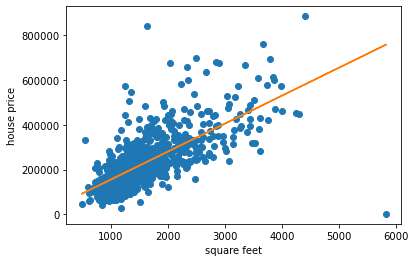

124.83341893798553


In [25]:
# ANSWER

#using np.polyfit to find the b1 which is the gradient

x1 = X
y1 = Y

m, b = np.polyfit(x1, y1, 1)

#plot out
plt.plot(x1, y1, 'o')
plt.plot(x1, m*x1 + b)
plt.xlabel('square feet')
plt.ylabel('house price')
plt.show()

print(m)

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [26]:
# ANSWER

#using np.polyfit to find the b0 which is the y-intercept

print(b)

31158.317931452337


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [43]:
# ANSWER

house['predicted_house_prices'] = m*house['sq__ft'] + b #yhat is the column of predicted values

house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,actual_minus_average_price,predicted_house_prices
Index,,,,,,,,,,,,,,
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,170962.965347,135519.056164
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,161972.965347,176838.917832
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,161304.965347,130525.719406
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,160877.965347,137516.390867
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,148284.965347,130650.552825


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [44]:
# ANSWER

house['residuals'] = house['price'] - house['predicted_house_prices'] 

In [45]:
house.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,actual_minus_average_price,predicted_house_prices,residuals
Index,,,,,,,,,,,,,,,
695,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142,369815.034653,325265.852949,274734.147051
557,8 TIDE CT,SACRAMENTO,95833,CA,3,2,1328,Residential,Fri May 16 00:00:00 EDT 2008,188335,38.609864,-121.492304,41849.965347,196937.098281,-8602.098281
770,7409 VOYAGER WAY,CITRUS HEIGHTS,95621,CA,3,1,1073,Residential,Thu May 15 00:00:00 EDT 2008,198000,38.700717,-121.313300,32184.965347,165104.576452,32895.423548
775,8789 SEQUOIA WOOD CT,ELK GROVE,95624,CA,4,2,1609,Residential,Thu May 15 00:00:00 EDT 2008,204750,38.438818,-121.374430,25434.965347,232015.289003,-27265.289003
534,6121 ALPINESPRING WAY,ELK GROVE,95758,CA,3,2,1240,Residential,Fri May 16 00:00:00 EDT 2008,167293,38.434075,-121.432623,62891.965347,185951.757415,-18658.757415
737,8025 ARROYO VISTA DR,SACRAMENTO,95823,CA,4,2,1392,Residential,Thu May 15 00:00:00 EDT 2008,150000,38.466540,-121.419029,80184.965347,204926.437093,-54926.437093
237,7922 MANSELL WAY,ELK GROVE,95758,CA,4,2,1595,Residential,Tue May 20 00:00:00 EDT 2008,260000,38.409634,-121.410787,29815.034653,230267.621138,29732.378862
445,4712 PISMO BEACH DR,ANTELOPE,95843,CA,5,3,2346,Residential,Mon May 19 00:00:00 EDT 2008,320000,38.707705,-121.354153,89815.034653,324017.518760,-4017.518760
529,3536 SUN MAIDEN WAY,ANTELOPE,95843,CA,3,2,1711,Residential,Fri May 16 00:00:00 EDT 2008,161500,38.709680,-121.382328,68684.965347,244748.297734,-83248.297734


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [46]:
# ANSWER

def sstot(y):
    """The total sum of squares"""
    y1 = np.sum((y - y.mean())**2)
    return y1


In [47]:
a1 = sstot(house['price'])
a1

11601948663821.031

In [48]:
def ssres(X,Y):
    """The residual sum of squares"""
    x1 = X
    y1 = Y
    m, b = np.polyfit(x1, y1, 1)
    yhat = m*x1 + b
    y2 = np.sum((y1 - yhat)**2)
    return y2

In [49]:
b1 = ssres(house['sq__ft'],house['price'])
b1

6041305378039.4

In [50]:
def rr(X,Y):
    
    def sstot(y):
        """The total sum of squares"""
        y1 = np.sum((y - y.mean())**2)
        return y1

    def ssres(X,Y):
        """The residual sum of squares"""
        x1 = X
        y1 = Y
        m, b = np.polyfit(x1, y1, 1)
        yhat = m*x1 + b
        y2 = np.sum((y1 - yhat)**2)
        return y2
    
    a = ssres(X,Y)
    b = sstot(Y)
    
    rsquare = 1 - (a/b)
    
    return rsquare


In [51]:
rr(house['sq__ft'],house['price'])

0.4792852861969368

##### 2.7.F [BONUS] Draw Plot of Predicted Line and the datapoints

In [52]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

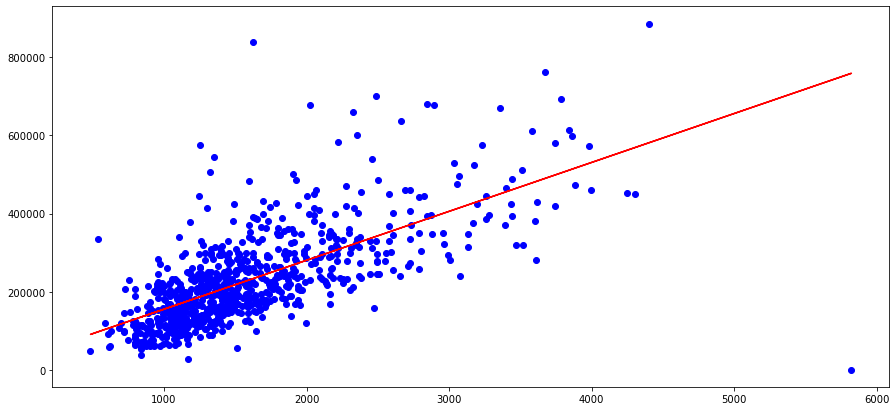

In [53]:
# ANSWER
Yhat = house['predicted_house_prices']
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

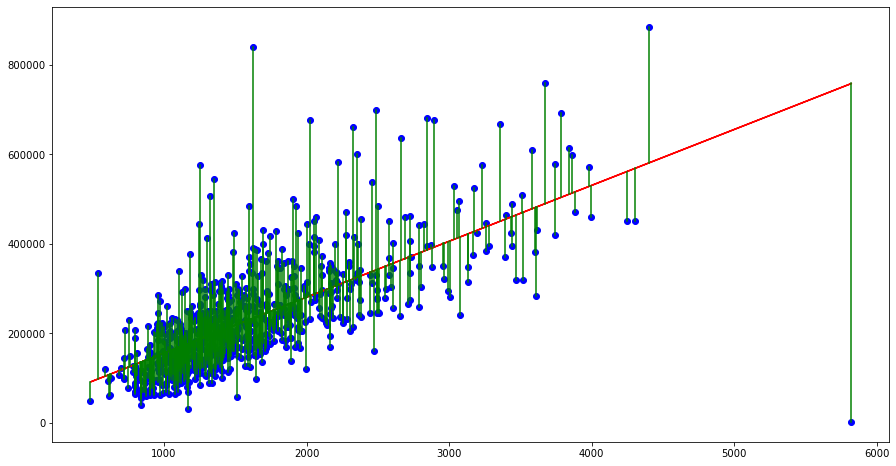

In [56]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

for _, row in house.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['predicted_house_prices']), 'g-')

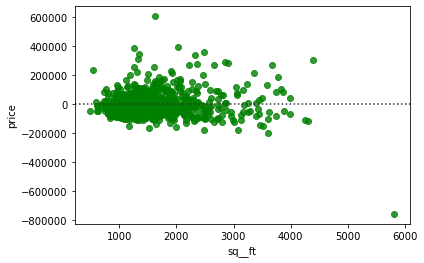

In [57]:
sns.residplot(x='sq__ft',y='price',data=house,color='green')
plt.show()

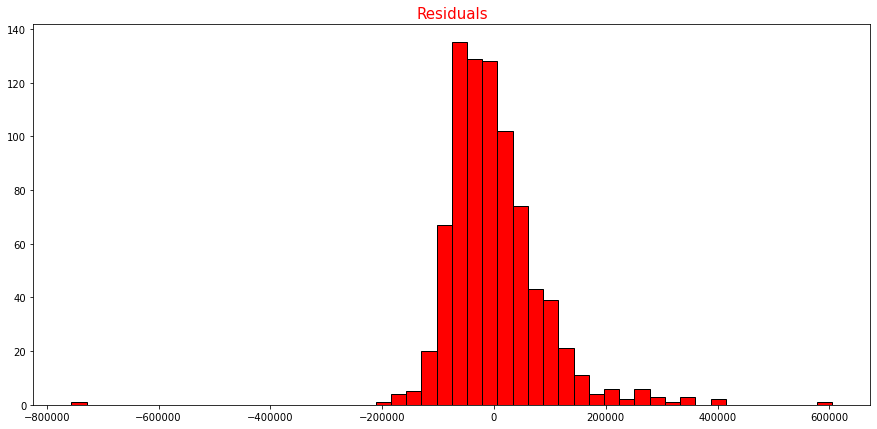

In [61]:
fig = plt.figure(figsize=(15,7))
n, bins, patches = plt.hist(house['residuals'], bins = 50, color='red', edgecolor = 'black')
plt.title('Residuals', color = 'red', fontsize=15)
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [62]:
# ANSWER

ans = m*1204 + b

ans

181457.7543327869



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



